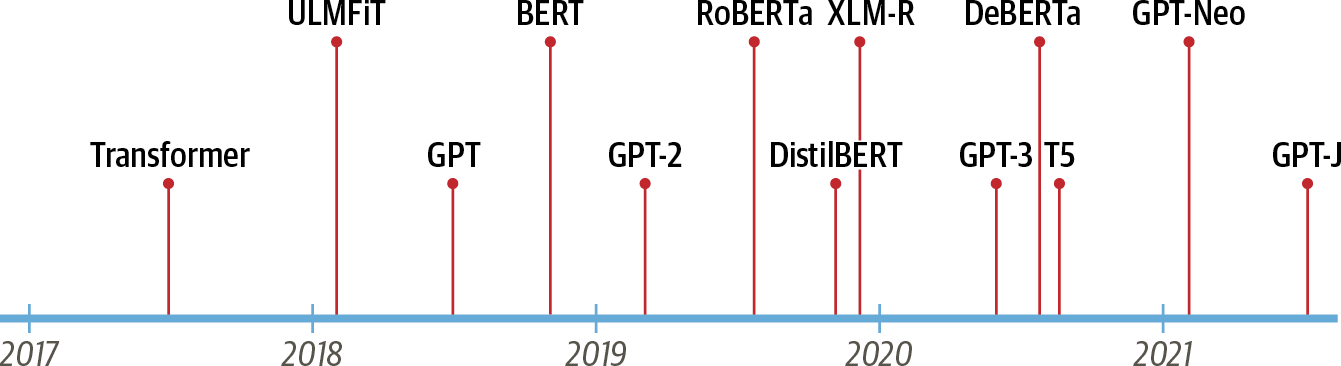

Figure 1-1. The transformers timeline

- The encoder-decoder framework
- Attention mechanisms
- Transfer learning

### Encoder-Decoder Framework

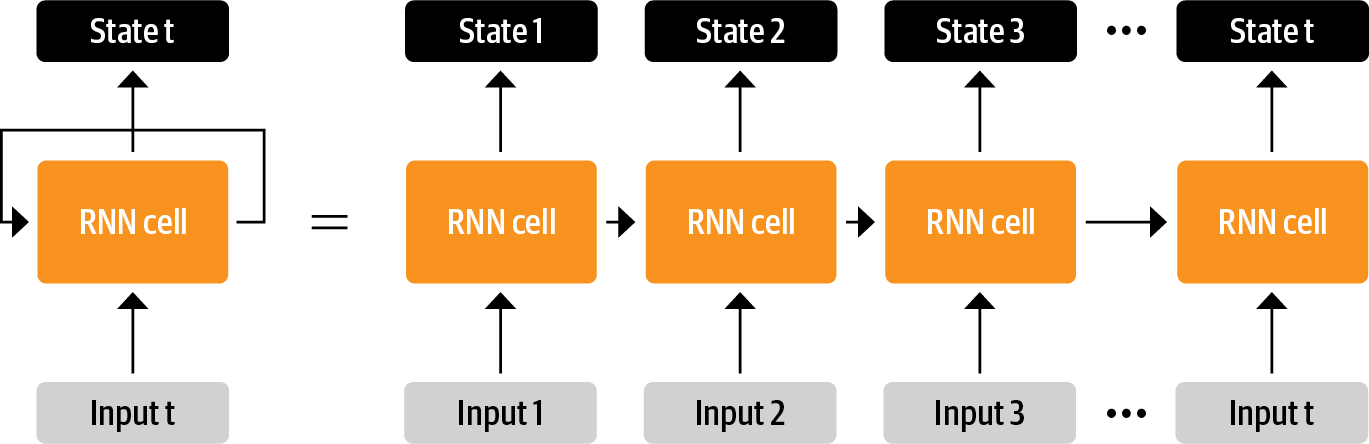

Figure 1-2. Unrolling an RNN in time

As illustrated on the left side of Figure 1-2, an
RNN receives some input (which could be a word or character), feeds it through the
network, and outputs a vector called the hidden state. At the same time, the model
feeds some information back to itself through the feedback loop, which it can then
use in the next step. This can be more clearly seen if we “unroll” the loop as shown on
the right side of Figure 1-2: the RNN passes information about its state at each step to
the next operation in the sequence. This allows an RNN to keep track of information
from previous steps, and use it for its output predictions.

Although elegant in its simplicity, one weakness of this architecture is that the final
hidden state of the encoder creates an information bottleneck: it has to represent the
meaning of the whole input sequence because this is all the decoder has access to
when generating the output. This is especially challenging for long sequences, where
information at the start of the sequence might be lost in the process of compressing
everything to a single, fixed representation.

### Attention Mechanisms

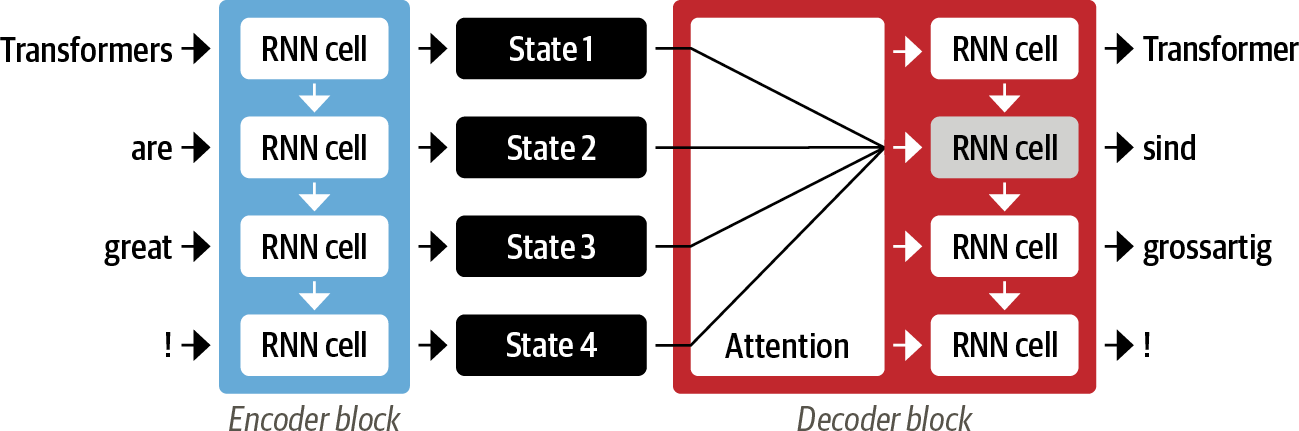

Figure 1-4. An encoder-decoder architecture with an attention mechanism for a pair of RNNs.

The main idea behind attention is that instead of producing a single hidden state for
the input sequence, the encoder outputs a hidden state at each step that the decoder
can access. However, using all the states at the same time would create a huge input
for the decoder, so some mechanism is needed to prioritize which states to use. This
is where attention comes in: it lets the decoder assign a different amount of weight, or
“attention,” to each of the encoder states at every decoding timestep. This process is
illustrated in Figure 1-4, where the role of attention is shown for predicting the third
token in the output sequence.

By focusing on which input tokens are most relevant at each timestep, these
attention-based models are able to learn nontrivial alignments between the words in a
generated translation and those in a source sentence.

Although attention enabled the production of much better translations, there was still
a major shortcoming with using recurrent models for the encoder and decoder: the
computations are inherently sequential and cannot be parallelized across the input
sequence.

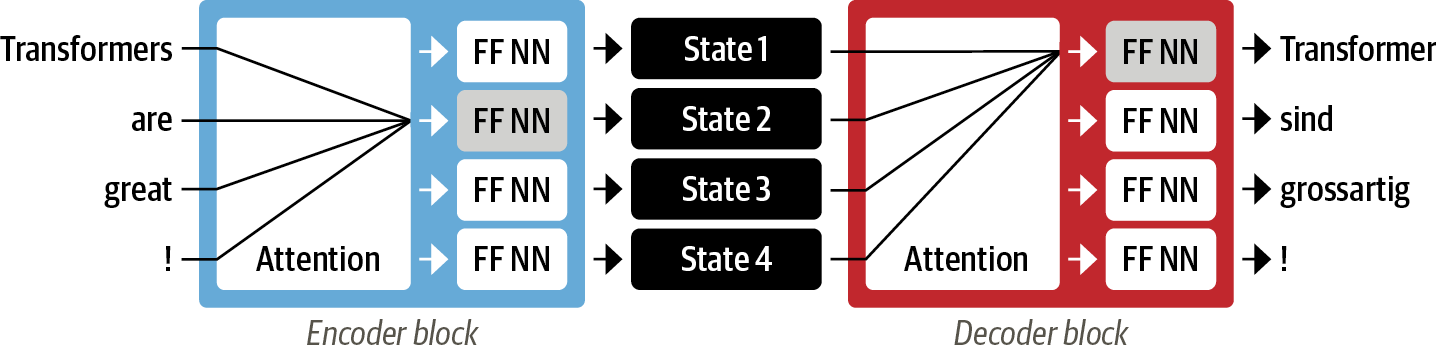

Figure 1-6. Encoder-decoder architecture of the original transformer

With the transformer, a new modeling paradigm was introduced: dispense with
recurrence altogether, and instead rely entirely on a special form of attention called
self-attention. We’ll cover self-attention in more detail in Chapter 3, but the basic idea
is to allow attention to operate on all the states in the same layer of the neural network.
This is shown in Figure 1-6, where both the encoder and the decoder have their
own self-attention mechanisms, whose outputs are fed to feed-forward neural networks
(FF NNs). This architecture can be trained much faster than recurrent models
and paved the way for many of the recent breakthroughs in NLP.

### Transfer Learning in NLP

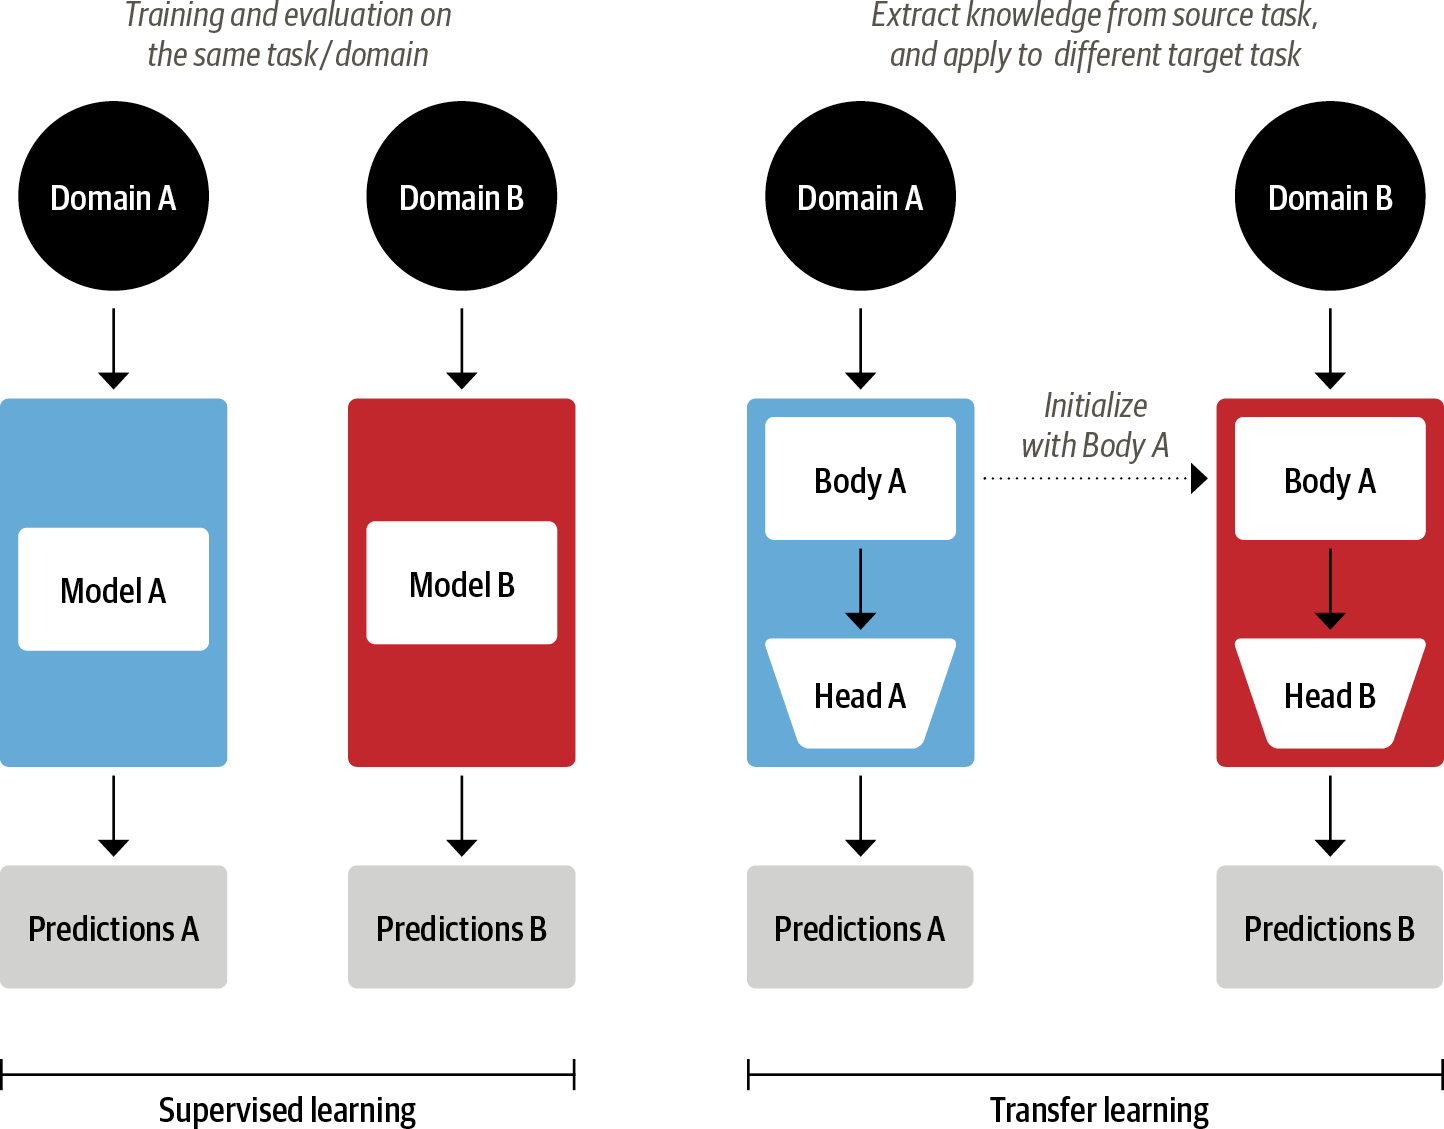

Figure 1-7. Comparison of traditional supervised learning (left) and transfer learning (right)

It is nowadays common practice in computer vision to use transfer learning to train a
convolutional neural network like ResNet on one task, and then adapt it to or finetune
it on a new task. This allows the network to make use of the knowledge learned
from the original task. Architecturally, this involves splitting the model into of a body
and a head, where the head is a task-specific network. During training, the weights of
the body learn broad features of the source domain, and these weights are used to initialize
a new model for the new task.7 Compared to traditional supervised learning,
this approach typically produces high-quality models that can be trained much more efficiently on a variety of downstream tasks, and with much less labeled data. A comparison
of the two approaches is shown in Figure 1-7.

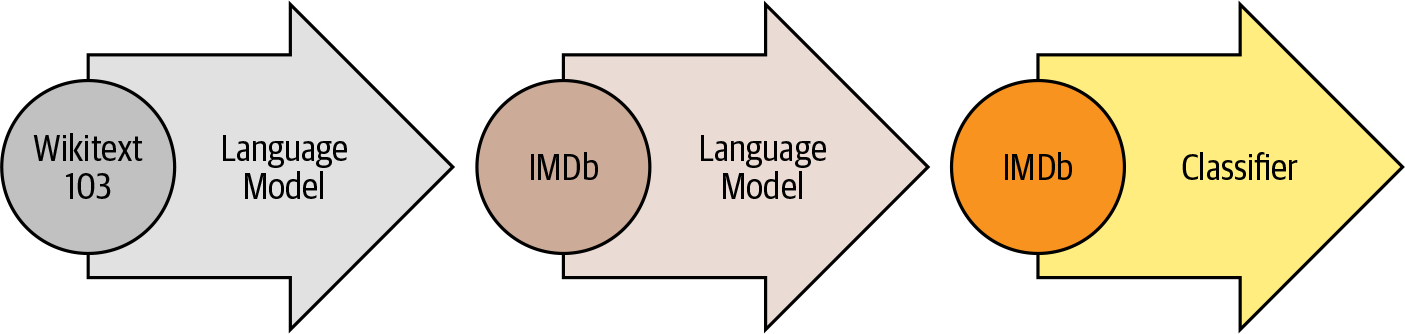

Figure 1-8. The ULMFiT process

In 2017 and 2018, several research groups proposed new approaches that finally
made transfer learning work for NLP. It started with an insight from researchers at OpenAI who obtained strong performance on a sentiment classification task by using features extracted from unsupervised pretraining.8 This was followed by ULMFiT, which introduced a general framework to adapt pretrained LSTM models for various tasks.

As illustrated in Figure 1-8, ULMFiT involves three main steps:

**Pretraining**
The initial training objective is quite simple: predict the next word based on the
previous words. This task is referred to as language modeling. The elegance of this
approach lies in the fact that no labeled data is required, and one can make use of
abundantly available text from sources such as Wikipedia.

**Domain adaptation**
Once the language model is pretrained on a large-scale corpus, the next step is to
adapt it to the in-domain corpus (e.g., from Wikipedia to the IMDb corpus of
movie reviews, as in Figure 1-8). This stage still uses language modeling, but now
the model has to predict the next word in the target corpus.

**Fine-tuning**
In this step, the language model is fine-tuned with a classification layer for the
target task (e.g., classifying the sentiment of movie reviews in Figure 1-8).


By introducing a viable framework for pretraining and transfer learning in NLP,
ULMFiT provided the missing piece to make transformers take off. In 2018, two
transformers were released that combined self-attention with transfer learning:

**GPT**
Uses only the decoder part of the Transformer architecture, and the same language
modeling approach as ULMFiT. GPT was pretrained on the BookCorpus,11
which consists of 7,000 unpublished books from a variety of genres including
Adventure, Fantasy, and Romance.

**BERT**
Uses the encoder part of the Transformer architecture, and a special form of language
modeling called masked language modeling. The objective of masked language
modeling is to predict randomly masked words in a text. For example,
given a sentence like “I looked at my [MASK] and saw that [MASK] was late.” the
model needs to predict the most likely candidates for the masked words that are
denoted by [MASK]. BERT was pretrained on the BookCorpus and English
Wikipedia.

## A tour of Transformer Applications

In [1]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

### Text Classification

In [2]:
from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [4]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


### Named Entity Recognition

In [6]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


### Question Answering

In [7]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


### Summarization

In [8]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu
Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1484: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


### Translation

In [10]:
translator = pipeline("translation_en_to_de",
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


### Text Generation

In [11]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. I

have received two parcels of Megatron. The first is in the mail from New York USA. It contains an "XR-G1"

card signed by Bumblebee. However, the cards were also mailed from Japan with an official

address from the


## The Hugging Face Ecosystem

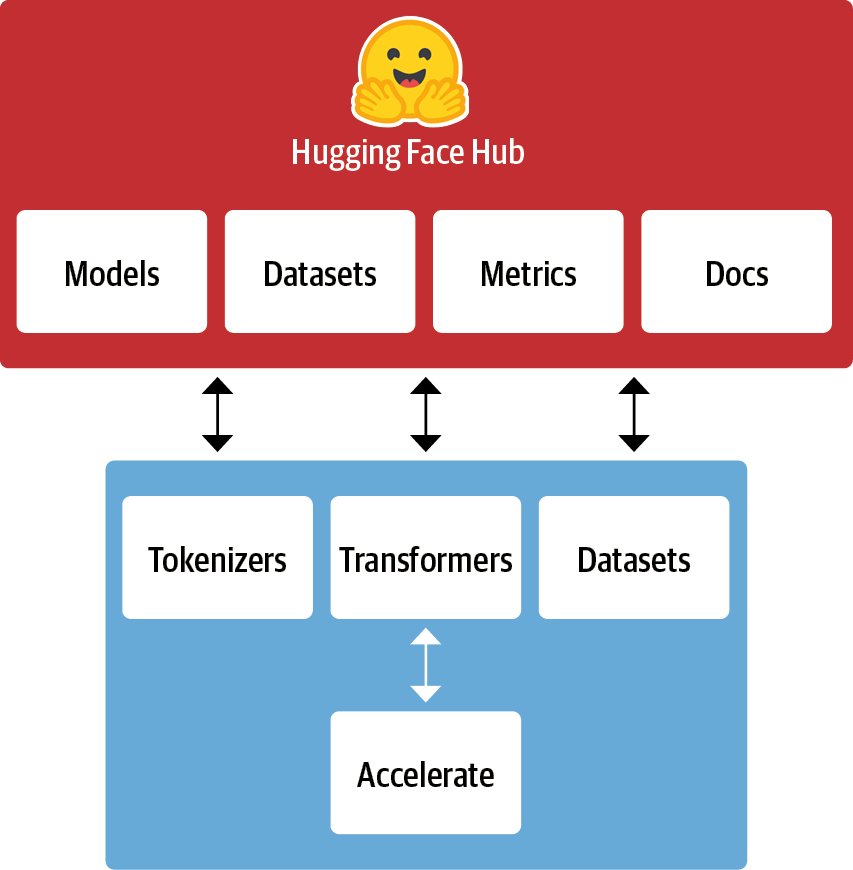

Figure 1-9. An overview of the Hugging Face ecosystem

### The Hugging Face Hub

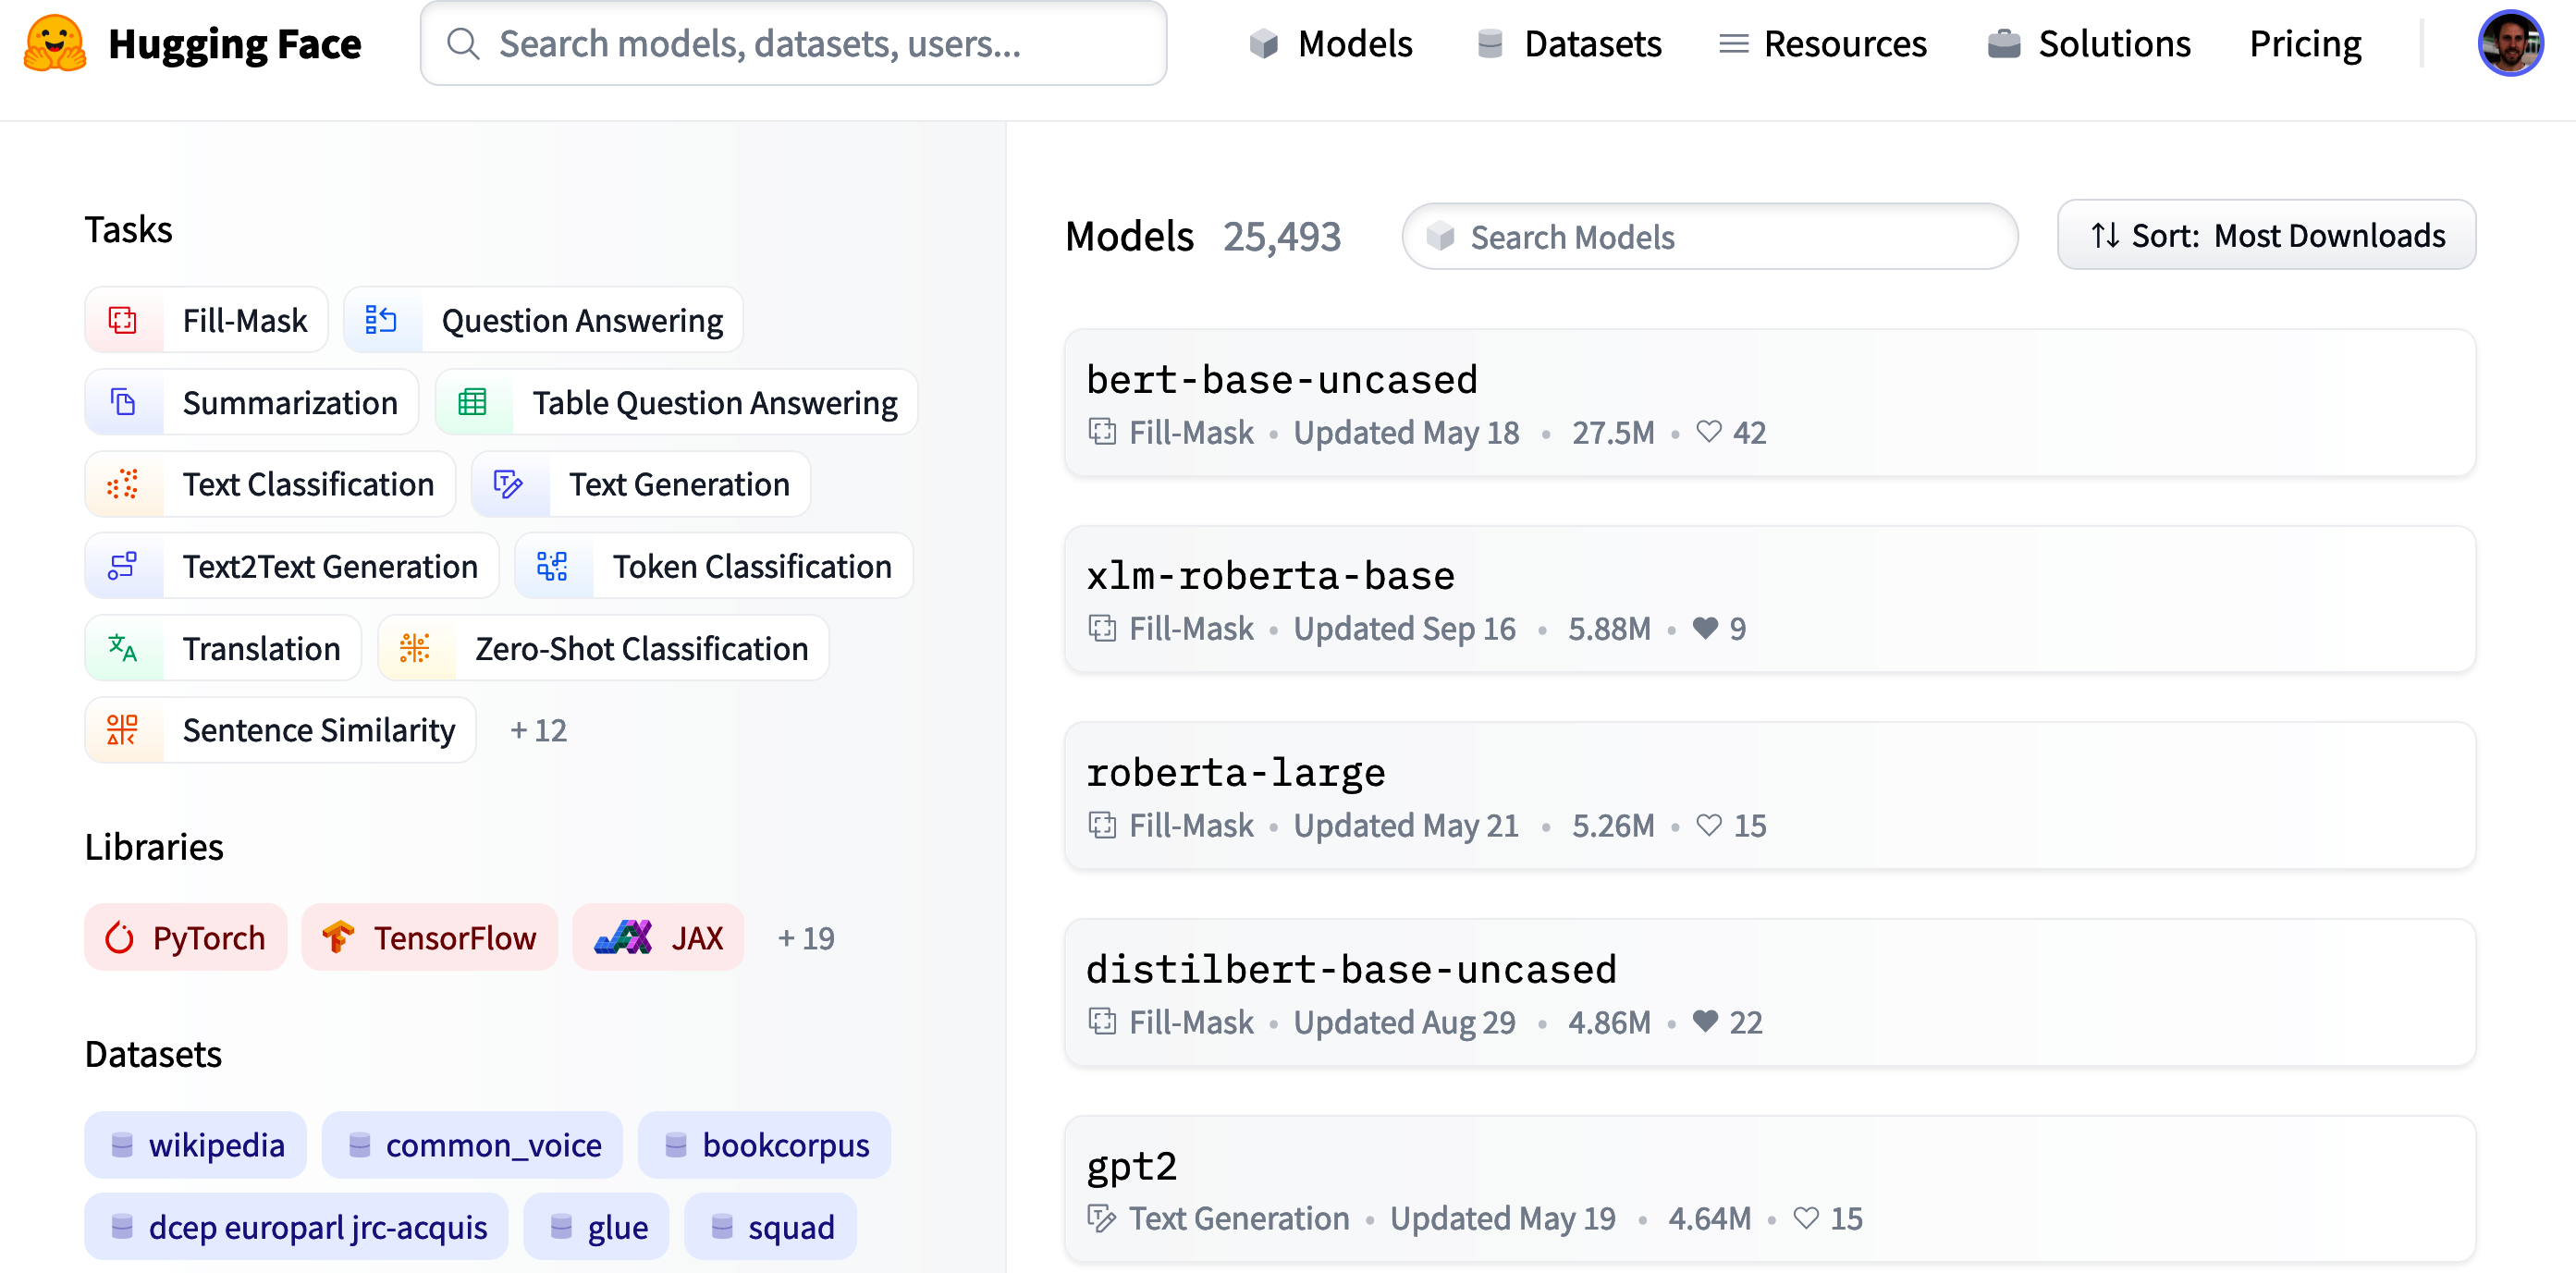

Figure 1-10. The Models page of the Hugging Face Hub, showing filters on the left and a list of models on the right

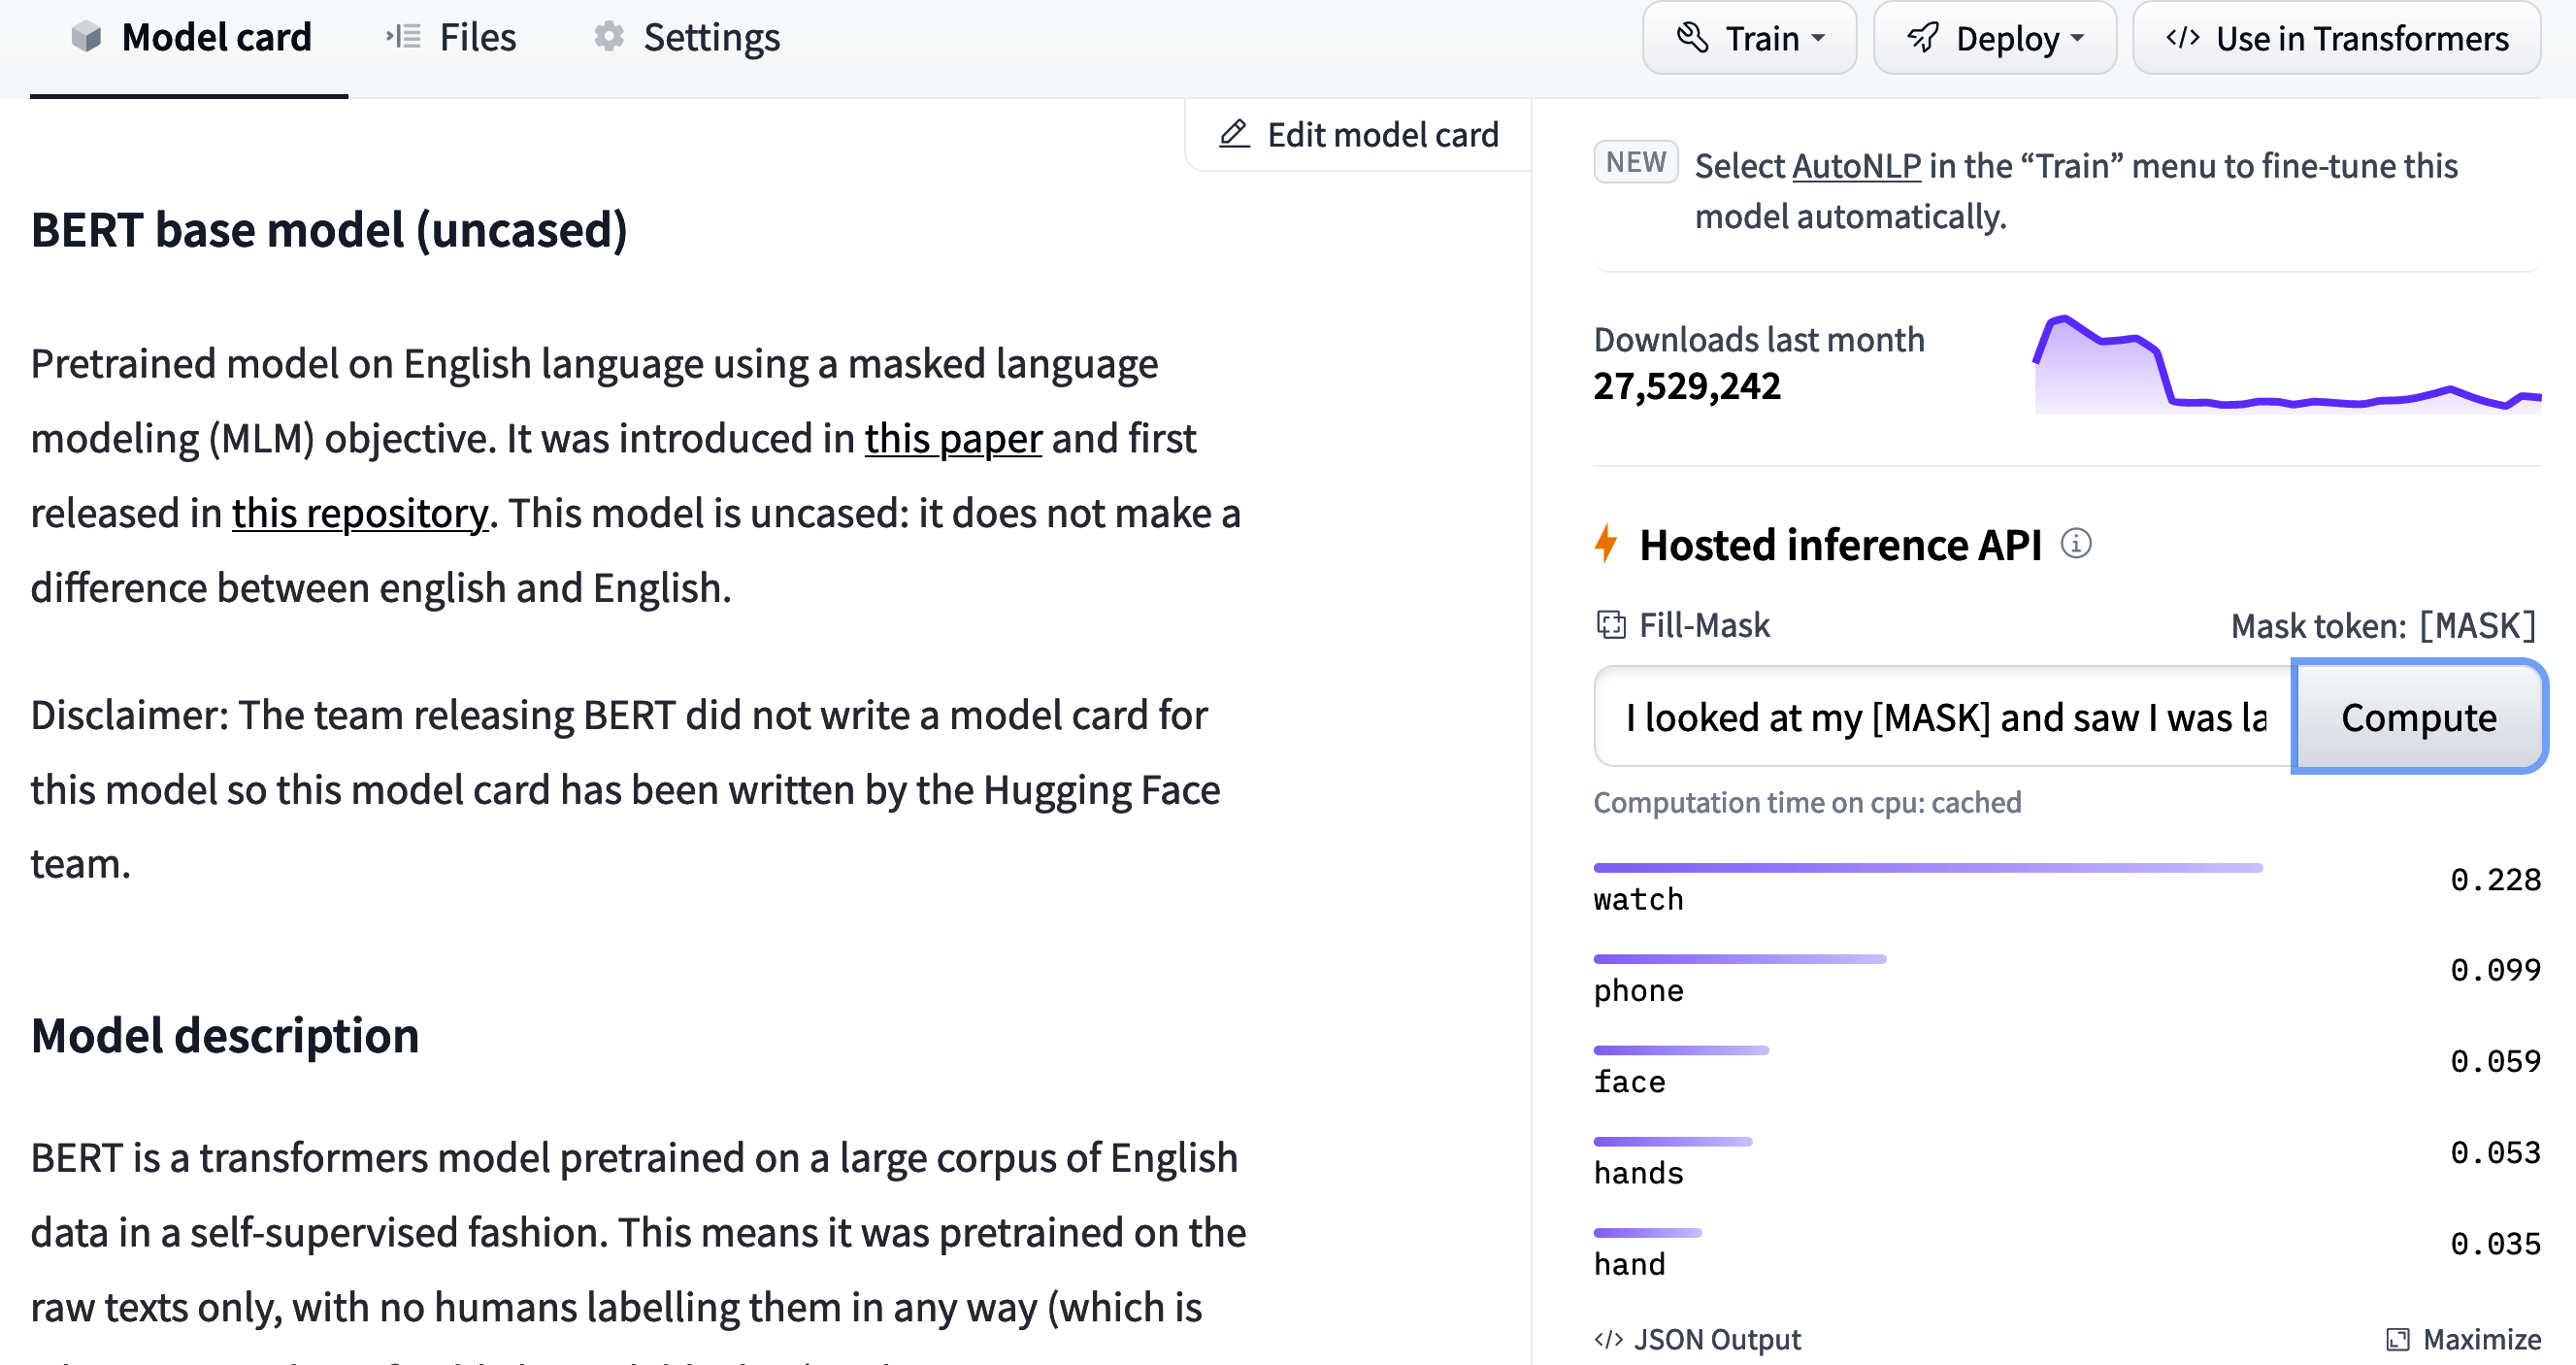

Figure 1-11. An example model card from the Hugging Face Hub: the inference widget, which allows you to interact with the model, is shown on the right.

NOTE - PyTorch and TensorFlow also offer hubs of their own and are worth checking out if a particular model or dataset is not available on the Hugging Face Hub.

- Hugging Face Tokenizers
- Hugging Face Datasets
- Hugging Face Accelerate

## Main Challenges with Transformers

**Language**
NLP research is dominated by the English language. There are several models for
other languages, but it is harder to find pretrained models for rare or lowresource
languages. In Chapter 4, we’ll explore multilingual transformers and
their ability to perform zero-shot cross-lingual transfer.

**Data availability**
Although we can use transfer learning to dramatically reduce the amount of
labeled training data our models need, it is still a lot compared to how much a
human needs to perform the task. Tackling scenarios where you have little to no
labeled data is the subject of Chapter 9.

**Working with long documents**
Self-attention works extremely well on paragraph-long texts, but it becomes very
expensive when we move to longer texts like whole documents. Approaches to
mitigate this are discussed in Chapter 11.

**Opacity**
As with other deep learning models, transformers are to a large extent opaque. It
is hard or impossible to unravel “why” a model made a certain prediction. This is
an especially hard challenge when these models are deployed to make critical
decisions. We’ll explore some ways to probe the errors of transformer models in
Chapters 2 and 4.

**Bias**
Transformer models are predominantly pretrained on text data from the internet.
This imprints all the biases that are present in the data into the models. Making
sure that these are neither racist, sexist, or worse is a challenging task. We discuss
some of these issues in more detail in Chapter 10.